In [ ]:
!pip install transformers
!pip install optimum[exporters]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.2/364.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import requests
from PIL import Image
from transformers import Pix2StructForConditionalGeneration, Pix2StructProcessor

model = Pix2StructForConditionalGeneration.from_pretrained("google/pix2struct-docvqa-base")
processor = Pix2StructProcessor.from_pretrained("google/pix2struct-docvqa-base")


In [ ]:
from PIL import Image
image = "/content/demo.png"
image = Image.open(image)
question = "what is In-session Phishing"

inputs = processor(images=image, text=question, return_tensors="pt")

predictions = model.generate(**inputs,max_new_tokens=200)
print(processor.decode(predictions[0],skip_special_tokens=True))   # 3m 30s

It is a Phishing attack based upon one web browsing session being able to detect the presence of another session (such as visit to an online banking website) on the same web detect the presence of another session (such as visit to an online banking website) on the same web detect the presence of another session (such as visit to an online banking website) on the same web detect the presence of another session (such as visit to an online banking website) on the same web detect the presence of another session (such as visit to an online banking website)


# TASKS SUPPORTED

In [ ]:
from optimum.exporters.tasks import TasksManager

distilbert_tasks = list(TasksManager.get_supported_tasks_for_model_type("pix2struct", "onnx").keys())
print(distilbert_tasks)

['image-to-text', 'image-to-text-with-past', 'visual-question-answering', 'visual-question-answering-with-past']


# METHOD 1 OF CONVERTING TO ONNX

In [ ]:
 # METHOD 1 OF CONVERTING TO ONNX
!optimum-cli export onnx --model google/pix2struct-docvqa-base convert_onnx/

2023-08-12 06:52:37.065992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Framework not specified. Using pt to export to ONNX.
Automatic task detection to visual-question-answering-with-past.
Using framework PyTorch: 2.0.1+cu118
/usr/local/lib/python3.10/dist-packages/transformers/models/pix2struct/modeling_pix2struct.py:221: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  scores = torch.max(scores, torch.tensor(torch.finfo(scores.dtype).min))
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

Using framework PyTorch: 2.0.1+cu118
/usr/l

#METHOD 2 OF CONVERTING TO ONNX

In [ ]:

!optimum-cli export onnx --model google/pix2struct-docvqa-base --task visual-question-answering convert_onnx_model/

2023-08-09 12:43:57.371541: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Framework not specified. Using pt to export to ONNX.
The task `visual-question-answering` was manually specified, and past key values will not be reused in the decoding. if needed, please pass `--task visual-question-answering-with-past` to export using the past key values.
Using framework PyTorch: 2.0.1+cu118
/usr/local/lib/python3.10/dist-packages/transformers/models/pix2struct/modeling_pix2struct.py:221: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  scores = torch.max(scores, torch.tensor(torch.finfo(scores.dtype).min))
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose

# INFERENCE #1 WITH ORTModelForVisualQuestionAnswering

In [ ]:
from transformers import AutoTokenizer
from optimum.onnxruntime import ORTModelForVisualQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained("./convert_onnx_model/")
model = ORTModelForCausalLM.from_pretrained("./convert_onnx_model/")
inputs = tokenizer("what is In-session Phishing", return_tensors="pt")
gen_tokens = model.generate(**inputs)
print(tokenizer.batch_decode(gen_tokens))

ImportError: ignored

# INFERENCE #2 WITH ORTModelForVision2Seq

## TRIAL 1

In [ ]:
from transformers import AutoImageProcessor, AutoTokenizer
from optimum.onnxruntime import ORTModelForVision2Seq
from PIL import Image
import requests


processor = AutoImageProcessor.from_pretrained("./convert_onnx_model/")
tokenizer = AutoTokenizer.from_pretrained("./convert_onnx_model/")
model = ORTModelForVision2Seq.from_pretrained("./convert_onnx_model/", export=True)

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = "/content/demo.png"
image = Image.open(image)

inputs = processor(image, return_tensors="pt")

gen_tokens = model.generate(**inputs)
outputs = tokenizer.batch_decode(gen_tokens, skip_special_tokens=True)


FileNotFoundError: ignored

## TRIAL 2

In [ ]:
from transformers import AutoImageProcessor, AutoTokenizer
from optimum.onnxruntime import ORTModelForVision2Seq
from PIL import Image
import requests


processor = AutoImageProcessor.from_pretrained("google/pix2struct-docvqa-base")
tokenizer = AutoTokenizer.from_pretrained("google/pix2struct-docvqa-base")
model = ORTModelForVision2Seq.from_pretrained("google/pix2struct-docvqa-base", export=True)




Framework not specified. Using pt to export to ONNX.
Using framework PyTorch: 2.0.1+cu118
/usr/local/lib/python3.10/dist-packages/transformers/models/pix2struct/modeling_pix2struct.py:221: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  scores = torch.max(scores, torch.tensor(torch.finfo(scores.dtype).min))


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Using framework PyTorch: 2.0.1+cu118
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:847: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if causal_mask.shape[1] < attention_mask.shape[1]:


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Using framework PyTorch: 2.0.1+cu118
Asked a sequence length of 16, but a sequence length of 1 will be used with use_past == True for `decoder_input_ids`.
/usr/local/lib/python3.10/dist-packages/transformers/models/pix2struct/modeling_pix2struct.py:848: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  elif past_key_value.shape[2] != key_value_states.shape[1]:


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



AttributeError: ignored

## TRIAL 3

In [ ]:
from transformers import AutoImageProcessor, AutoTokenizer
from optimum.onnxruntime import ORTModelForVision2Seq
from PIL import Image
import requests
import onnx

processor = AutoImageProcessor.from_pretrained("google/pix2struct-docvqa-base")
tokenizer = AutoTokenizer.from_pretrained("google/pix2struct-docvqa-base")
#model = ORTModelForVision2Seq.from_pretrained("google/pix2struct-docvqa-base", export=True)
onnx_model = onnx.load("/content/convert_onnx_model/decoder_model.onnx")


In [ ]:
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = "/content/demo.png"
image = Image.open(image)
question="what is keylogger?"
inputs = processor(images=image,text=question,return_tensors="pt")

#gen_tokens = onnx_model.generate(**inputs)
gen_tokens = onnx_model.generate(**inputs)
outputs = tokenizer.batch_decode(gen_tokens, skip_special_tokens=True)

ValueError: ignored

# INFERENCE #3 WITH OPTIMUM CLI CMD LINE & LOADING FROM ONNXRUNNER

In [ ]:
!optimum-cli onnxruntime --model convert_onnx/decoder_model_merged.onnx --input images:/content/demo.png --input text:"what is In-session Phishing" --output text

2023-08-09 11:15:23.670567: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: optimum-cli onnxruntime
       [-h]
       {optimize,quantize}
       ...
optimum-cli onnxruntime: error: argument {optimize,quantize}: invalid choice: 'convert_onnx/decoder_model_merged.onnx' (choose from 'optimize', 'quantize')


In [ ]:
import torch
from torch.onnx.utils import ONNXRunner
model = ONNXRunner.from_file("/content/convert_onnx/decoder_model_merged.onnx")

ImportError: ignored

# INFERENCE #4 BY TRYING TO EXPORT THE MODEL USING PYTORCH

In [ ]:
import torch
b=760
torch.onnx.export(model,
                 torch.randn(1,1,b,b,requires_grad=True),
                 "docvqa.onnx",
                 verbose=True,
                 input_names=["input_0", "input_1"],
                 output_names=["output_0"],
             opset_version=14,
                 export_params=True,
                   dynamic_axes={'input' : {1 : 'b'},    # variable length axes
                                'output' : {1 : 'b'}})


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



RuntimeError: ignored

# INFERENCE #5 USING ORTModelForImageClassification

In [ ]:
import requests
from PIL import Image
from optimum.onnxruntime import ORTModelForImageClassification
from transformers import AutoFeatureExtractor

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

preprocessor = AutoFeatureExtractor.from_pretrained("google/pix2struct-docvqa-base")
model = ORTModelForImageClassification.from_pretrained("google/pix2struct-docvqa-base")

inputs = preprocessor(images=image, return_tensors="np")

outputs = model(**inputs)
logits = outputs.logits

ValueError: ignored

# INFERENCE #6 BY LOADING ENCODER AND DECODER MODELS

In [ ]:
import onnx
import torch
import onnxruntime
model_encoder = onnx.load("/content/model/encoder_model.onnx")
model_decoder = onnx.load("/content/model/decoder_model_merged.onnx")
onnx.checker.check_model(model_encoder)
onnx.checker.check_model(model_decoder)
ort_session_encoder = onnxruntime.InferenceSession("/content/model/encoder_model.onnx")
ort_session_decoder = onnxruntime.InferenceSession("/content/model/decoder_model_merged.onnx")
print("Model encoder loaded")
print("Model decoder loaded")


from transformers import TrOCRProcessor
if __name__ == "__main__":
    image = "/content/demo.png"
    image = Image.open(image)
    processor = TrOCRProcessor.from_pretrained("google/pix2struct-docvqa-base")

    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    encoder_output = model_encoder(pixel_values)
    decoder_output = model_decoder(input_ids=torch.LongTensor(np.random.rand(1,384)),
                                 encoder_hidden_states=torch.FloatTensor(encoder_output),
                                 attention_mask=torch.LongTensor(np.ones((1,384))))


Model encoder loaded
Model decoder loaded


ValueError: ignored

# VISUALIZING WITH NETRON

## ENCODER EXPECTED INPUT AND OUTPUT

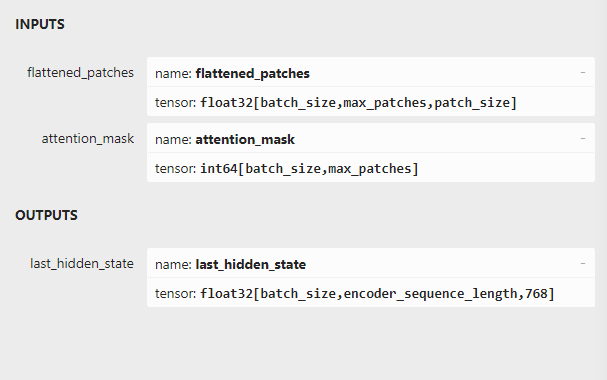

## DECODER EXPECTED INPUT AND OUTPUT

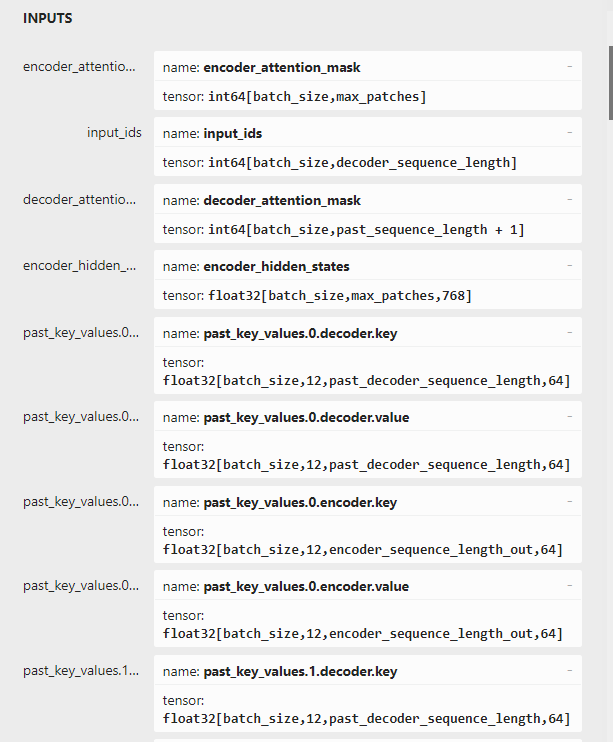

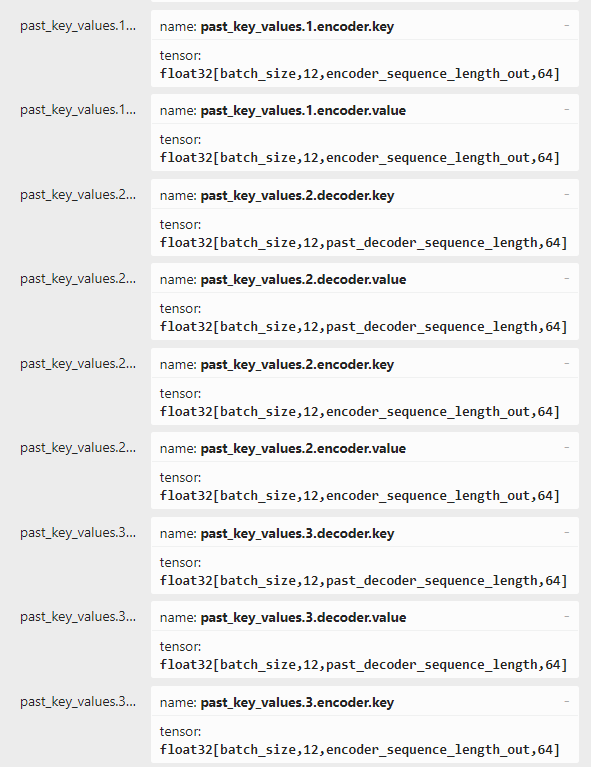

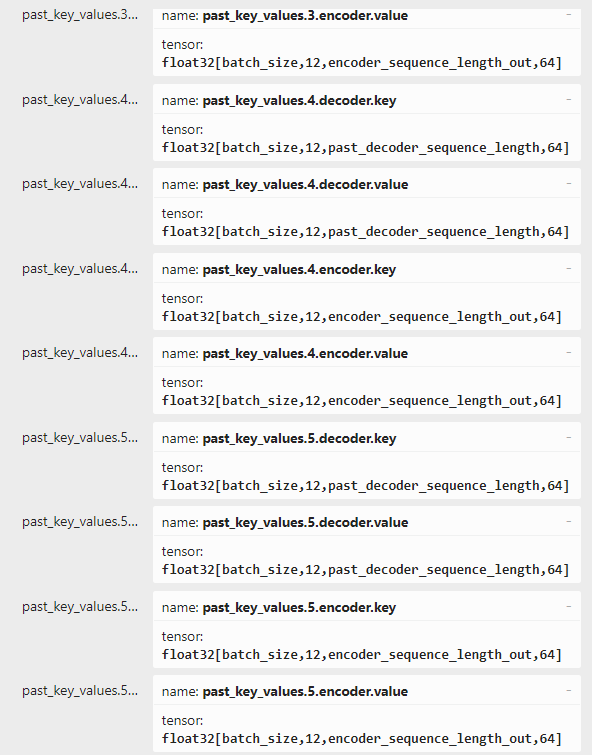

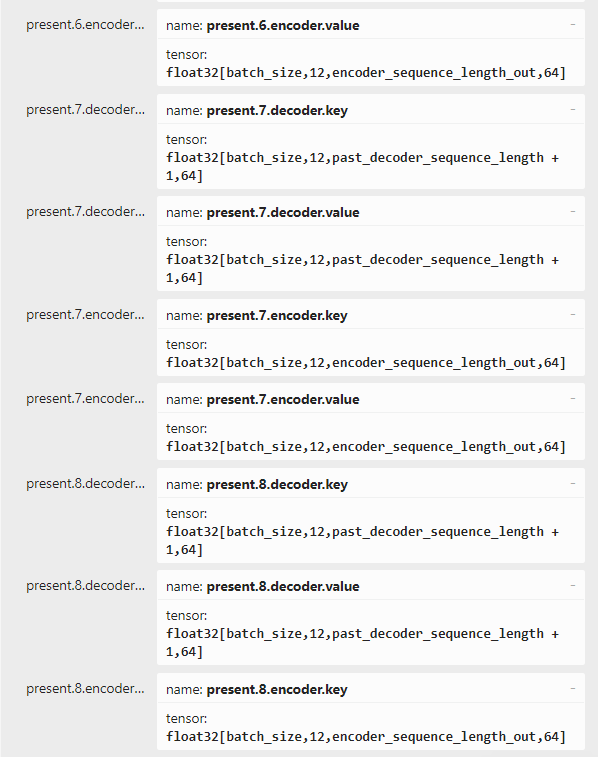

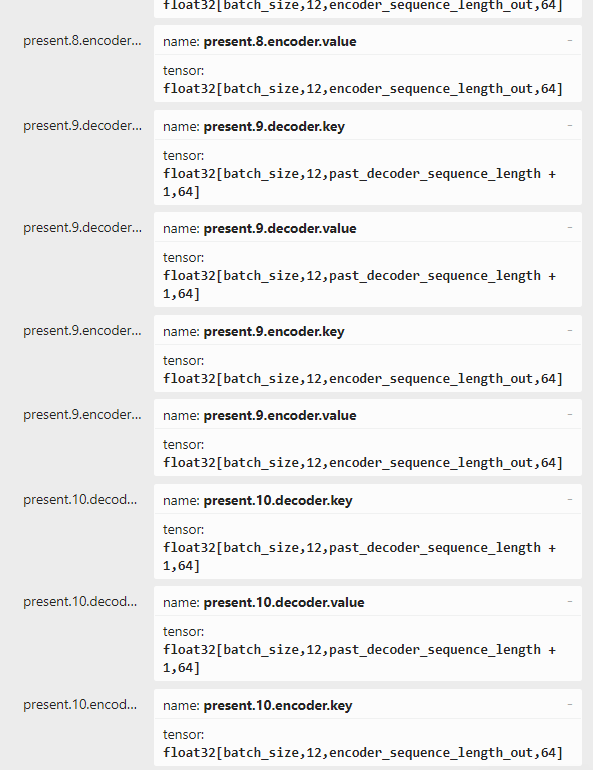

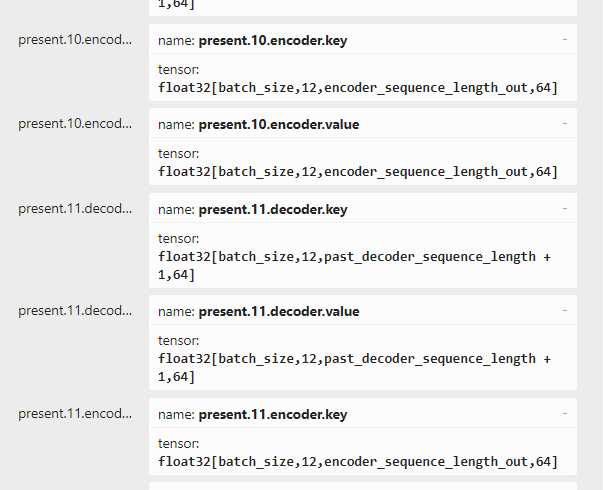